In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('./bbdc_2018/train-en.csv', usecols=['wind_speed48M', 'Output']).sort_values('Output')



In [2]:
# Exercise 1

df.describe()


,wind_speed48M,Output
count,52508.000000,52508.000000
mean,5.626846,27293.661461
std,2.466787,29313.824237
min,0.550000,-1628.000000
25%,3.925000,4928.000000
50%,5.330000,17300.000000
75%,6.965000,40415.000000
max,18.870000,120520.000000


In [3]:
data = []
data2 = []
step = 500

split = np.arange(step, len(df), step)

for i in split:
    reduced_df = df[i-step:i]
    
    data.append([reduced_df['wind_speed48M'].mean(), reduced_df['Output'].mean()])
    
mean_points_x = [x[0] for x in data]
mean_points_y = [x[1] for x in data]

In [22]:
outliers= []
df = df.sort_values('wind_speed48M')
for i in range(len(df)):
    if i < len(df)-step:
        index = i // step
    val = df.iloc[i]['Output']
    mean_y = mean_points_y[index]
    
    diff = abs(mean_y - val)
    if diff > 20000:
        outliers.append(True)
    else:
        outliers.append(False)
        
    

    
#     if val > upper_bound or val < lower_bound:

#         outliers.append(True)
#     else:
#         outliers.append(False)
        
df['Outliers'] = outliers

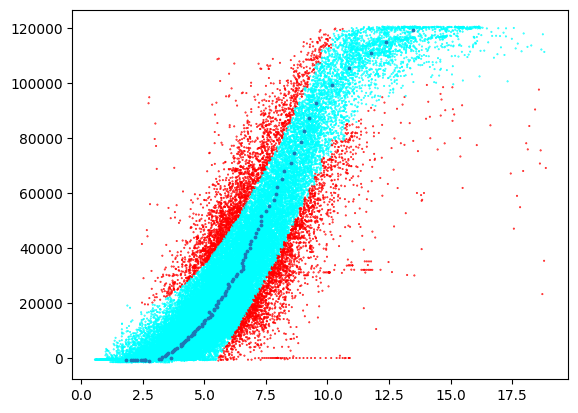

In [23]:
# Exercise 2 

colors = {
    False: 'cyan',
    True: 'red'
}

plt.scatter(df["wind_speed48M"], df["Output"], c=df['Outliers'].map(colors), s=0.2) 




plt.scatter(mean_points_x, mean_points_y, s=3)
plt.show() 

In [15]:
x_train = pd.read_csv('./bbdc_2018/train-en.csv', usecols=["wind_speed152M"])
y_train = pd.read_csv('./bbdc_2018/train-en.csv', usecols=["Output"])

x_test = pd.read_csv('./bbdc_2018/eval-en.csv', usecols=["wind_speed152M"])
y_test = pd.read_csv('./bbdc_2018/eval-en.csv', usecols=["Output"])


reg = LinearRegression().fit(x_train, y_train)
scores = reg.score(x_train, y_train)
predictions = reg.predict(x_test)
print(predictions)

[[18113.20211469]
 [18817.3814946 ]
 [19521.56087451]
 ...
 [76325.36418744]
 [76325.36418744]
 [76325.36418744]]


In [32]:
plt.scatter(x_test["wind_speed152M"], y_test["Output"], color='red', s=0.1)
plt.plot(x_test, predictions, color="red", linewidth=1)
plt.show()

KeyError: 'Output'

In [54]:

columns = ['wind_speed48M', 'wind_speed100M', 'wind_speed152M']

for column in columns:
    x_train = pd.read_csv('./bbdc_2018/train-en.csv', usecols=[column])
    y_train = pd.read_csv('./bbdc_2018/train-en.csv', usecols=['Output'])

    x_test = pd.read_csv('./bbdc_2018/eval-en.csv', usecols=[column])
    y_test = pd.read_csv('./bbdc_2018/eval-en.csv', usecols=['Output'])


    reg = LinearRegression().fit(x_train, y_train)
    scores = reg.score(x_train, y_train)
    predictions = reg.predict(x_test)
    
    error = mean_absolute_error(y_test, predictions)
    
    print(f'Mean square error {error}')

Mean square error 11803.778406874893
Mean square error 12412.379576340172
Mean square error 12984.010219238153


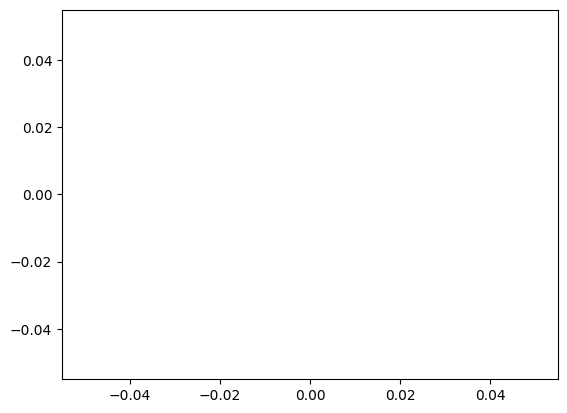

In [58]:
outlier_r = []

for i in range(0, len(y_test)):
    error = y_test["Output"][i] - predictions[i]
    if error > 8000 or error < -8000:
        outlier_r.append(True) 
    else:
        outlier_r.append(False) 
colors = {
    True: 'red',
    False: 'blue'
}
        
               
plt.scatter(x_test["wind_speed152M"], y_test["Output"].map(colors), color="green")

In [59]:
y_test

,Output
0,15912
1,18736
2,19680
3,18112
4,21144
...,...
17663,111028
17664,90668
17665,103344
17666,115660
